In [2]:
! [ -e /content ] && pip install -Uqq fastai CGDs && rm -rf /usr/local/lib/python3.7/dist-packages/examples # colab

In [3]:
#%cd ..
%cd fastai3-reactor

/content/fastai3-reactor


In [4]:
from CGDs import ACGD
from fastai.vision.all import *
from fastai.vision.gan import generate_noise
from src.GAN.gan_learner_b import *
from src.GAN.loss import *
from src.GAN.evolution_recorder import *
from examples.models.mnist_gan import *

In [5]:
path = untar_data(URLs.MNIST)
path.ls()

(#2) [Path('/root/.fastai/data/mnist_png/training'),Path('/root/.fastai/data/mnist_png/testing')]

In [6]:
def noise_fn(size):
    return lambda fn: generate_noise(fn, size=size)

In [7]:
bs = 64
#lr = 1e-4
epochs = 3
nz = 100
loss = CrossEntropyLoss()

In [8]:
dblock = DataBlock((TransformBlock, ImageBlock(cls=PILImageBW)),
                   get_items=get_image_files,
                   getters=[noise_fn(nz), lambda path: path],
                   splitter=TrainTestSplitter(test_size=0.1),
                   batch_tfms=Normalize.from_stats([0.5], [0.5]))

dls = dblock.dataloaders(path, bs=bs)

In [9]:
len(dls.train)

1093

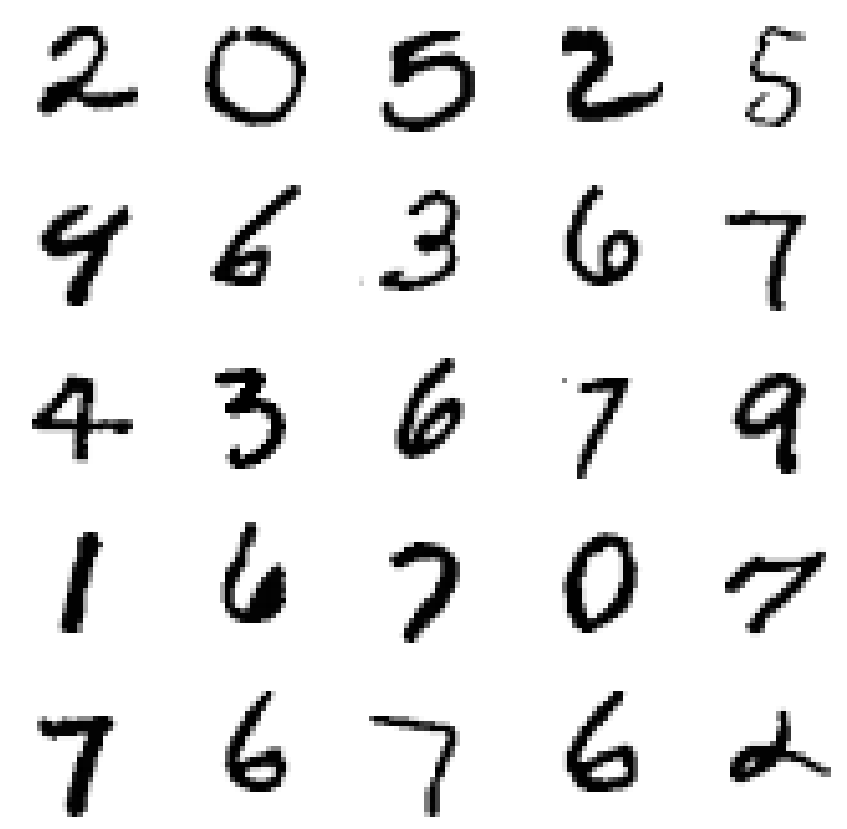

In [10]:
dls.show_batch(max_n=25)

`GANLearnerB` uses a special optimizer to solve minimax problem instead of two separate optimizers that minimize generator or discriminator losses. Learners based on `AbstractGANLearner` may use different approaches to solve minimax problem, but in same time use all ready GAN features from fastai. This allows to do some researches easily.

In [11]:
gen = Generator(nz).cuda()
dis = Discriminator().cuda()

In [12]:
# value of minimax function probably does not make much sense, but no metrics are available now
rec1 = TempRecorderB(50)
rec2 = GANEvolutionRecorder(max_n=64, storege_path='examples/records/02')
cbs = [rec1, rec2]

In [13]:
minimax_opt = partial(ACGD, device='cuda')
learn = GANLearnerB(dls, gen, dis, loss, minimax_opt=minimax_opt, cbs=cbs)
# slow
learn.fit(epochs)#, lr)

loss=-1.38802
loss=-1.34775
loss=-1.34998
loss=-1.37105
loss=-1.37471
loss=-1.37563
loss=-1.37810
loss=-1.37183
loss=-1.37152
loss=-1.37495
loss=-1.37730
loss=-1.37318
loss=-1.37882
loss=-1.37847
loss=-1.37840
loss=-1.37745
loss=-1.37903
loss=-1.38312
loss=-1.38111
loss=-1.38164
loss=-1.37944
loss=-1.38231
loss=-1.38453
loss=-1.38293
loss=-1.37871
loss=-1.38414
loss=-1.38161
loss=-1.37624
loss=-1.38242
loss=-1.38137
loss=-1.38172
loss=-1.38115
loss=-1.38165
loss=-1.38103
loss=-1.38265
loss=-1.38177
loss=-1.38297
loss=-1.38151
loss=-1.37947
loss=-1.38262
loss=-1.38190
loss=-1.38244
loss=-1.38221
loss=-1.38215
loss=-1.38221
loss=-1.38248
loss=-1.38092
loss=-1.38428
loss=-1.38302
loss=-1.38339
loss=-1.38158
loss=-1.38219
loss=-1.38207
loss=-1.38267
loss=-1.38316
loss=-1.38268
loss=-1.38080
loss=-1.38221
loss=-1.38288
loss=-1.38163
loss=-1.38291
loss=-1.38380
loss=-1.38341
loss=-1.38211
loss=-1.38210


In [14]:
rec2.plot_animation()